In [2]:
# Importing the essential Libraries
import pandas as pd
import numpy as np
import gdown

In [3]:
#importing the dataset from drive
gdown.download_folder('https://drive.google.com/file/d/1qixVe7UxHjg7nQBHOthKlusbz5LfL5xa/view?usp=drive_link', quiet = True )

False

In [7]:
# Reading the Dataset
df = pd.read_csv("/content/Customer-Churn-Records.csv")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [11]:
df.shape

(10000, 18)

In [12]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [13]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [14]:
# Printing Unique Values of the categorical variables
print(df['Geography'].unique())
print(df['Gender'].unique())
print(df['NumOfProducts'].unique())
print(df['HasCrCard'].unique())
print(df['IsActiveMember'].unique())
print(df['Complain'].unique())
print(df['Card Type'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]
[1 0]
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [15]:
# Checking if there are null values or not
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [16]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [17]:
# Including only Potential Predictors as independent varibles
final_dataset = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned']]

In [18]:
final_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [19]:
# Converting the categorical variables into numerical and avoiding Dummy Varibale Trap
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [20]:
final_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0


In [21]:
import seaborn as sns

In [22]:
sns.pairplot(final_dataset)

Output hidden; open in https://colab.research.google.com to view.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

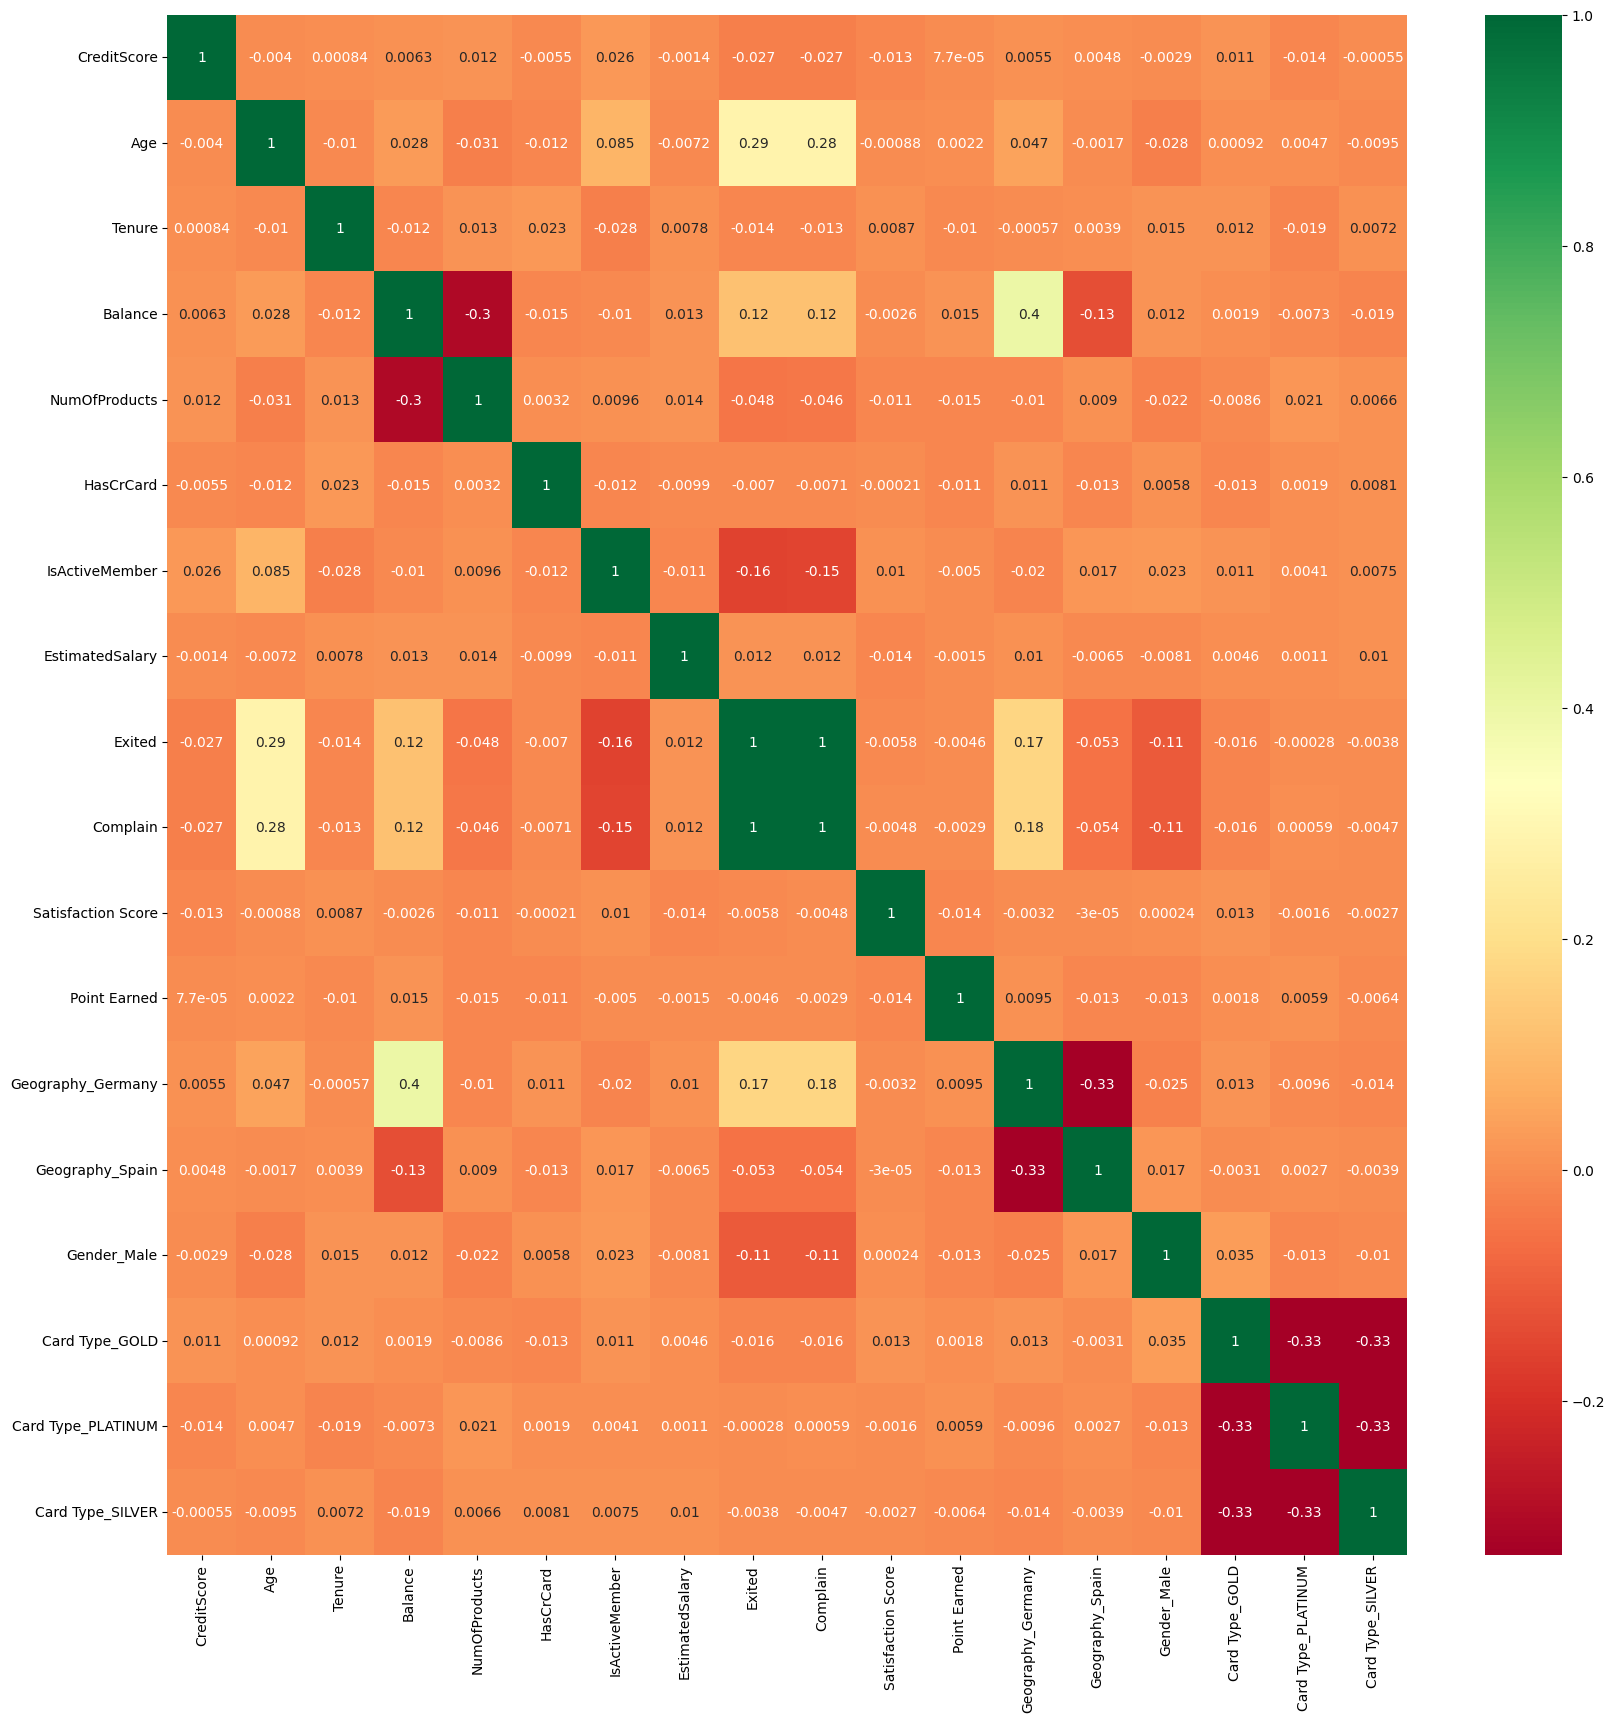

In [24]:
# Plotting The Correlations between all the features
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [25]:
final_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0


In [26]:
# Splitting the Dataset into Dependent and Independent Variables
X = final_dataset.iloc[:, [0,1,2,3,4,5,6,7,9,10,11,12,13,14]]
y = final_dataset.iloc[:, 8].values

In [27]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,3,456,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,0,1,0


In [28]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor

# Split dataset into training, validation, and holdout sets
X_temp, X_holdout, y_temp, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

Random Forest Classifier

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor

# Split dataset into training, validation, and holdout sets
X_temp, X_holdout, y_temp, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_holdout = scaler.transform(X_holdout)

# Calculate feature importance
model = ExtraTreesRegressor()
model.fit(X, y)

# Print feature importance scores
print("Feature Importance:")
print(model.feature_importances_)

# Train the Random Forest Classification model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = rf_classifier.predict(X_valid)

# Evaluate the model on the validation set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_valid, y_valid_pred)
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
class_report = classification_report(y_valid, y_valid_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# You can also make predictions on the holdout (test) set for final evaluation
y_holdout_pred = rf_classifier.predict(X_holdout)

Feature Importance:
[6.61646685e-04 1.12136896e-03 8.76775569e-04 1.43112112e-03
 4.90349339e-04 1.65523067e-04 1.53245532e-04 9.00028479e-04
 9.91403558e-01 6.10819199e-04 1.31145668e-03 2.07072680e-04
 1.17658456e-04 5.49376551e-04]
Accuracy: 0.9975
Confusion Matrix:
[[1584    2]
 [   3  411]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1586
           1       1.00      0.99      0.99       414

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Logistic Regression

In [31]:
final_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0


In [32]:
# Splitting the Dataset into Dependent and Independent Variables
X = final_dataset.iloc[:, [0,1,2,3,4,5,6,7,9,10,11]]
y = final_dataset.iloc[:, 8].values

In [33]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,2,464
1,608,41,1,83807.86,1,0,1,112542.58,1,3,456
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377
3,699,39,1,0.00,2,0,0,93826.63,0,5,350
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425


In [34]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and fit the logistic regression model on the training data
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = logistic_model.predict(X_valid)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_valid, y_valid_pred)
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
class_report = classification_report(y_valid, y_valid_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# You can also make predictions on the holdout (test) set for final evaluation
y_holdout_pred = logistic_model.predict(X_holdout)

Accuracy: 0.9975
Confusion Matrix:
[[1584    2]
 [   3  411]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1586
           1       1.00      0.99      0.99       414

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [36]:
final_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0


In [37]:
# Splitting the Dataset into Dependent and Independent Variables
X = final_dataset.iloc[:, [0,1,2,3,4,5,6,7,9,10,11]]
y = final_dataset.iloc[:, 8].values

In [38]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,2,464
1,608,41,1,83807.86,1,0,1,112542.58,1,3,456
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377
3,699,39,1,0.00,2,0,0,93826.63,0,5,350
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425


In [39]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [40]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and fit the XGBoost model on the training data
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = xgb_model.predict(X_valid)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_valid, y_valid_pred)
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
class_report = classification_report(y_valid, y_valid_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# You can also make predictions on the holdout (test) set for final evaluation
y_holdout_pred = xgb_model.predict(X_holdout)

Accuracy: 0.9975
Confusion Matrix:
[[1584    2]
 [   3  411]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1586
           1       1.00      0.99      0.99       414

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and fit the Decision Tree model on the training data
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = decision_tree_model.predict(X_valid)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_valid, y_valid_pred)
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
class_report = classification_report(y_valid, y_valid_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# You can also make predictions on the holdout (test) set for final evaluation
y_holdout_pred = decision_tree_model.predict(X_holdout)

Accuracy: 0.994
Confusion Matrix:
[[1584    2]
 [  10  404]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1586
           1       1.00      0.98      0.99       414

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [42]:
import pickle
file = open('Customer_Churn_Prediction.pkl', 'wb')
pickle.dump(rf_classifier, file)